# 2 Gradient decent methods

## Task 0 - Gradients in 1D 

Given the function $g: \mathbf{R} \rightarrow \mathbf{R}$ defined as 

$$
g(x) = x^2+x+1
$$

define the function, compute its gradient and plot it on $x \in [-5, 5]$.

In [78]:
def g(x):
    return x**2 + x + 1 

In [79]:
import torch 
x = torch.linspace(-5, 5, steps=100, requires_grad=True)

dgdx = torch.autograd.grad(g(x).sum(), x)[0]

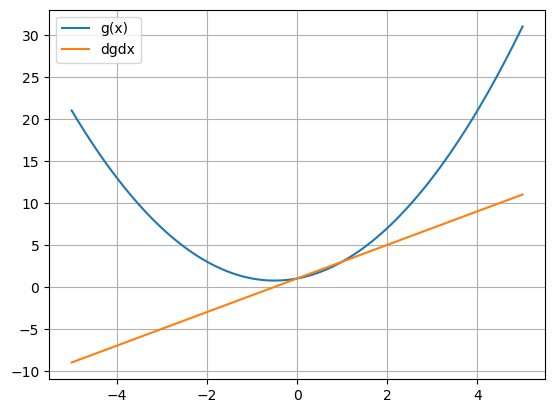

In [80]:
import matplotlib.pyplot as plt 

with torch.no_grad():
    plt.plot(x, g(x), label="g(x)")
    plt.plot(x, dgdx, label="dgdx")
    plt.legend()
    plt.grid()


We re-use the quadratic function from last exercise $f: \mathcal{R}^2 \rightarrow \mathcal{R}$ defined as 

$$
f(\mathbf{x}) = (\mathbf{x} - \tilde{\mathbf{x}}) \cdot \mathbf{Q} \cdot (\mathbf{x} - \tilde{\mathbf{x}})
$$
with 
$$
\mathbf{Q} = 
\begin{pmatrix}
    2 & 1 \\
    1 & 1 
\end{pmatrix} 
\quad 
\text{and}
\quad
\tilde{\mathbf{x}} = 
\begin{pmatrix}
    -1\\
    1 
\end{pmatrix}
$$
to test the implemented gradient decent methods. 
The solution to the problem 
$$
\min_{\mathbf{x}} f(\mathbf{x})
$$
is $\mathbf{x}^*=\tilde{\mathbf{x}}$.

In [81]:
xt = torch.tensor([-1.0, 1.0])
Q = torch.tensor([[2.0, 1.0],[1.0, 1.0]])

def f(x):
    dx = x - xt 
    return torch.einsum("...i,ij,...j", dx, Q, dx)

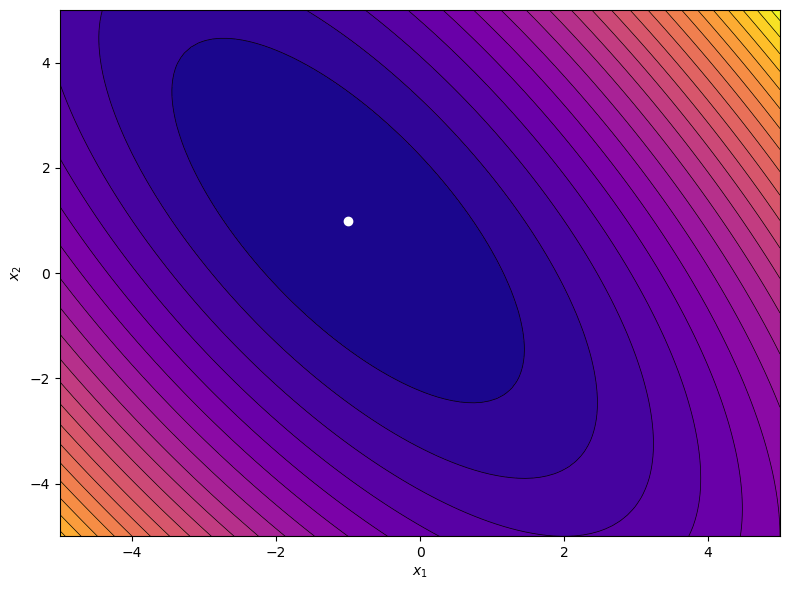

In [82]:
x0 = torch.linspace(-5, 5, steps=100, requires_grad=True)
x1 = torch.linspace(-5,5, steps=100, requires_grad=True)
x = torch.stack(torch.meshgrid(x0, x1, indexing="xy"), dim=2)

dfdx = torch.autograd.grad(f(x).sum(), x)[0]

from utils import plot_contours

plot_contours(x[...,0], x[...,1], f(x), opti=[-1, 1])

## Task 1 - Simple steepest decent

We have a predefined function named `simple_decent(x_init, func, eta=0.1, maxiter=100)` that takes an initial point $\mathbf{x}_0 \in \mathcal{R}^d$ named `x_init`, a function `func`, a step size `eta`, and an iteration limit `max_iter`. 

a) Implement a simple steepest gradient decent in that function. The function should return a list of all steps $\mathbf{x}_k \in \mathcal{R}^d$ taken during the optimization, i.e. `[[x1_0, x2_0, ..., xd_0], [x1_1, x2_1, ..., xd_1], ...]`

In [83]:
def simple_decent(x_init, func, eta=0.1, max_iter=100):
    # Copy initial x to new differentiable tensor x
    x = x_init.clone().requires_grad_()

    points = [x]
    
    for i in range(max_iter):
        # Compute gradient
        grad = torch.autograd.grad(func(x).sum(), x)[0]
        # Make the step 
        x = x - eta*grad
        # Save result
        points.append(x)


    return points


b) Test the function with the following code for 
$$
    \mathbf{x}_0 = 
\begin{pmatrix}
    4\\
    -1 
\end{pmatrix}
$$
and play around with the optional parameters. 

Final values are x_1=-0.821, x_2=0.733


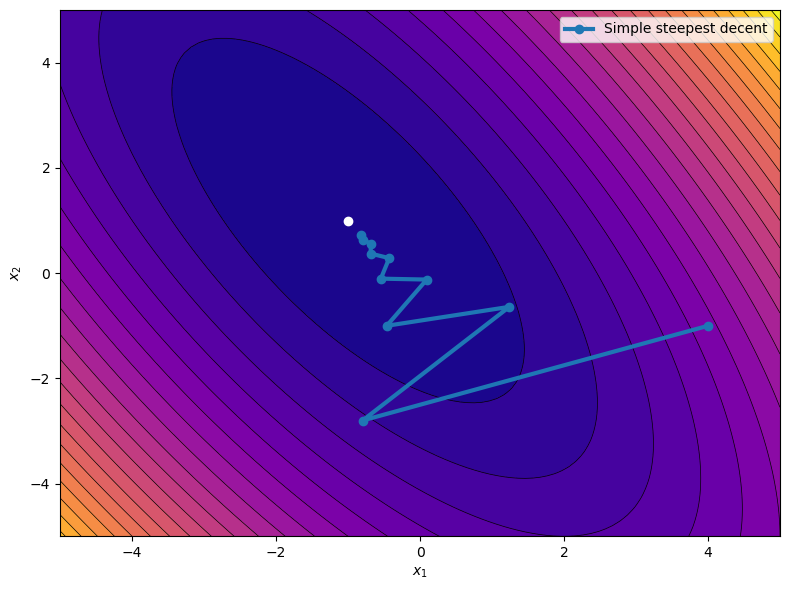

In [84]:
x_init = torch.tensor([4.0, -1.0])
path = simple_decent(x_init, f, eta=0.3, max_iter=10)
plot_contours(
    x[..., 0],
    x[..., 1],
    f(x),
    opti=[-1, 1],
    paths={"Simple steepest decent": path}
)
print(f"Final values are x_1={path[-1][0]:.3f}, x_2={path[-1][1]:.3f}")


## Task 2 - Steepest decent method with incomplete line search

We have a predefined function named `incomplete_line_search(x_init, func, eta_0=5.0, c=0.5, rho=0.8, maxiter=10)` that takes an initial point $\mathbf{x}_0 \in \mathcal{R}^d$ named `x_init`, a function `func`, an initial step size `eta_0`, a Armijo constant `c`, a backtracking reduction factor `rho` and an iteration limit `max_iter`.

a) Implement a steepest gradient decent with incompleted line search using the backtracking algorithm in that function. The function should return a list of all steps $\mathbf{x}_k \in \mathcal{R}^d$ taken during the optimization, i.e. `[[x1_0, x2_0, ..., xd_0], [x1_1, x2_1, ..., xd_1], ...]`

In [85]:
def incomplete_line_search(x_init, func, eta_0=5.0, c=0.5, rho=0.8, max_iter=10):
    # Copy initial x to new differentiable tensor x
    x = x_init.clone().requires_grad_()

    points = []
    
    # --> Implement your solution here 

    return points


b) Test the function with the following code for 
$$
    \mathbf{x}_0 = 
\begin{pmatrix}
    4\\
    -1 
\end{pmatrix}
$$
and play around with the optional arguments.

IndexError: list index out of range

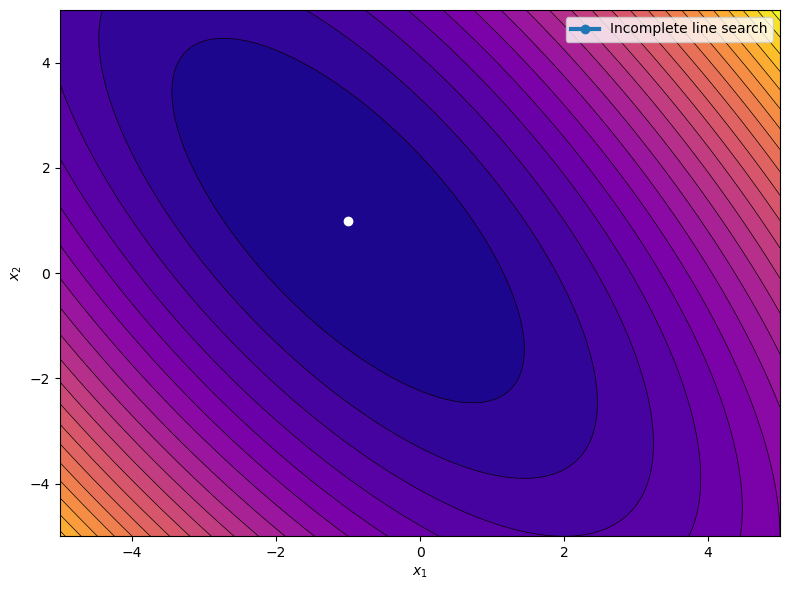

In [86]:
x_init = torch.tensor([4.0, -1.0])
path = incomplete_line_search(x_init, f)
plot_contours(
    x[..., 0], x[..., 1], f(x), opti=[-1, 1], paths={"Incomplete line search": path}
)
print(f"Final values are x_1={path[-1][0]:.3f}, x_2={path[-1][1]:.3f}")


## Task 3 - Steepest decent method with complete line search

We have a predefined function named `complete_line_search(x_init, func, maxiter=10)` that takes an initial point $\mathbf{x}_0 \in \mathcal{R}^d$ named `x_init`, a function `func`, and an iteration limit `max_iter`.

a) Implement a steepest gradient decent with completed line search re-using the previous `incomplete_line_search` to solve the subproblem of finding the optimal step size $\eta^*_k$. The function should return a list of all steps $\mathbf{x}_k \in \mathcal{R}^d$ taken during the optimization, i.e. `[[x1_0, x2_0, ..., xd_0], [x1_1, x2_1, ..., xd_1], ...]`

In [ ]:
def complete_line_search(x_init, func, max_iter=10):
    # Copy initial x to new differentiable tensor x
    x = x_init.clone().requires_grad_()

    points = []
    
    # --> Implement your solution here 

    return points


b) Test the function with the following code for 
$$
    \mathbf{x}_0 = 
\begin{pmatrix}
    4\\
    -1 
\end{pmatrix}
$$
and discuss why an incomplete line search is usually choosen over a complete line search.

IndexError: list index out of range

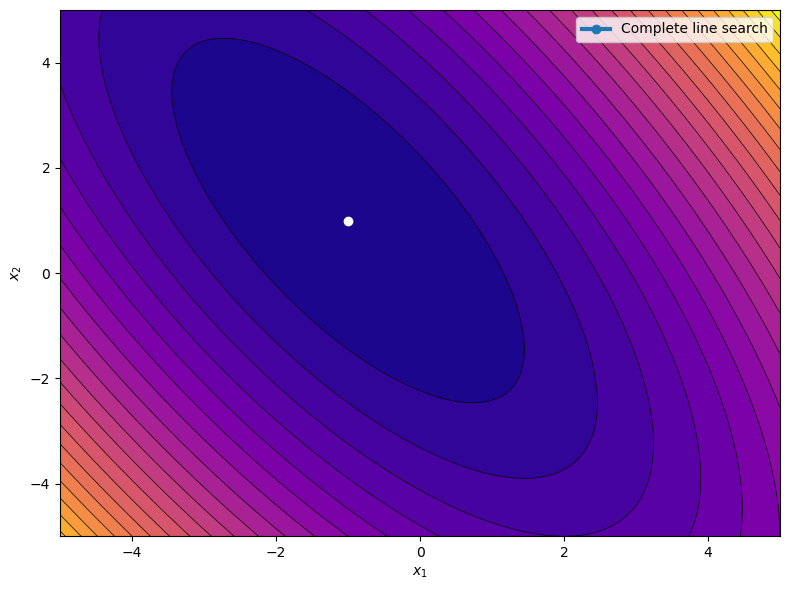

In [ ]:
x_init = torch.tensor([4.0, -1.0])
path = complete_line_search(x_init, f)
plot_contours(
    x[..., 0], x[..., 1], f(x), opti=[-1, 1], paths={"Complete line search": path}
)
print(f"Final values are x_1={path[-1][0]:.3f}, x_2={path[-1][1]:.3f}")


## Task 4 - Conjugated gradients
We have a predefined function named `cg(x_init, func, maxiter=5)` that takes an initial point $\mathbf{x}_0 \in \mathcal{R}^d$ named `x_init`, a function `func`, and an iteration limit `max_iter`.

a) Implement the conjugated gradients method in that function re-using the previous `incomplete_line_search` to solve the subproblem of finding the optimal step size $\eta^*_k$. The function should return a list of all steps $\mathbf{x}_k \in \mathcal{R}^d$ taken during the optimization, i.e. `[[x1_0, x2_0, ..., xd_0], [x1_1, x2_1, ..., xd_1], ...]`

In [ ]:
def cg(x_init, func, max_iter=5):
    # Copy initial x to new differentiable tensor x
    x = x_init.clone().requires_grad_()

    points = []
    
    # --> Implement your solution here 

    return points


b) Test the function with the following code for 
$$
    \mathbf{x}_0 = 
\begin{pmatrix}
    4\\
    -1 
\end{pmatrix}
$$
and discuss its benefits and drawbacks.

IndexError: list index out of range

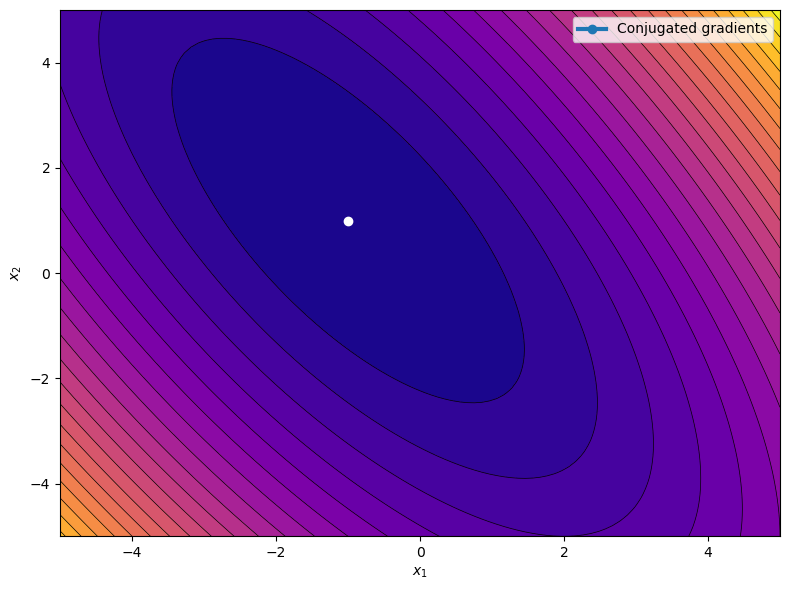

In [ ]:
x_init = torch.tensor([4.0, -1.0])
path = cg(x_init, f)
plot_contours(
    x[..., 0], x[..., 1], f(x), opti=[-1, 1], paths={"Conjugated gradients": path}
)
print(f"Final values are x_1={path[-1][0]:.3f}, x_2={path[-1][1]:.3f}")


## Task 5 - BFGS 
We have a predfined function named `bfgs(x_init, func, maxiter=5)` that takes an initial point $\mathbf{x}_0 \in \mathcal{R}^d$ named `x_init`, a function `func`, and an iteration limit `max_iter`.

a) Implement the BFGS method in that function re-using the previous `incomplete_line_search` to solve the subproblem of finding the optimal step size $\eta^*_k$. The function should return a list of all steps $\mathbf{x}_k \in \mathcal{R}^d$ taken during the optimization, i.e. `[[x1_0, x2_0, ..., xd_0], [x1_1, x2_1, ..., xd_1], ...]`

In [ ]:
def bfgs(x_init, func, max_iter=5):
    # Copy initial x to new differentiable tensor x
    x = x_init.clone().requires_grad_()

    points = []
    
    # --> Implement your solution here 

    return points


b) Test the function with the following code for 
$$
    \mathbf{x}_0 = 
\begin{pmatrix}
    4\\
    -1 
\end{pmatrix}
$$
and discuss its benefits and drawbacks.

IndexError: list index out of range

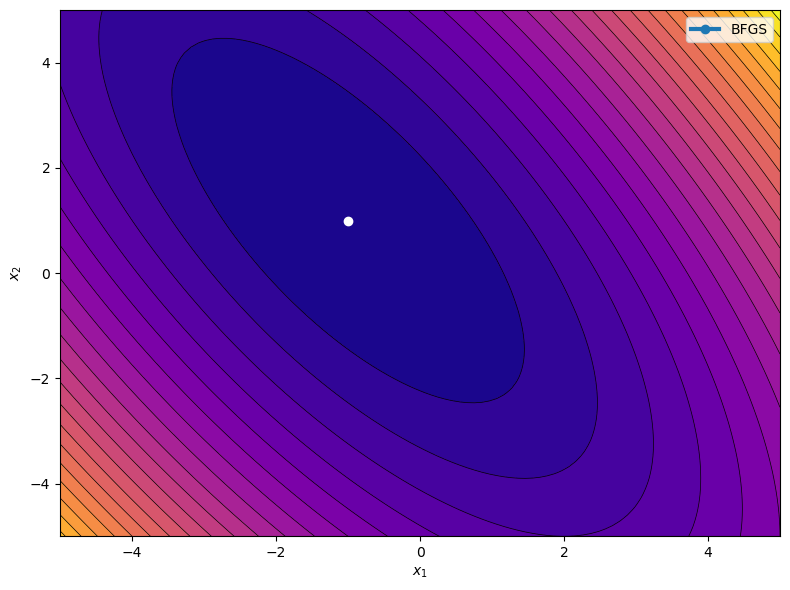

In [ ]:
x_init = torch.tensor([4.0, -1.0])
path = bfgs(x_init, f)
plot_contours(
    x[..., 0],
    x[..., 1],
    f(x),
    opti=[-1, 1],
    paths={"BFGS": path}
)
print(f"Final values are x_1={path[-1][0]:.3f}, x_2={path[-1][1]:.3f}")

## Task 6 - Comparison
The following code plots all optimization paths on the given quadratic problem. 

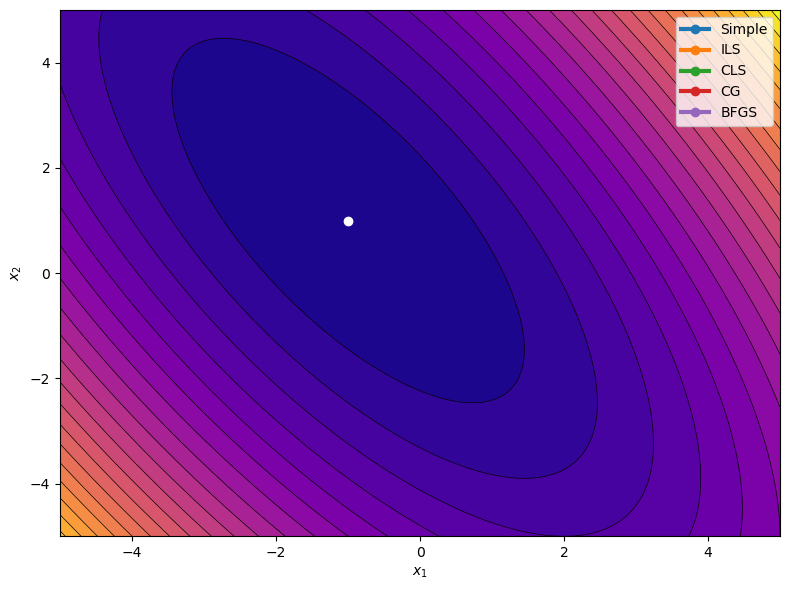

In [ ]:
x_init = torch.tensor([4.0, -1.0])
path_simple = simple_decent(x_init, f)
path_ils = incomplete_line_search(x_init, f)
path_cls = complete_line_search(x_init, f)
path_cg = cg(x_init, f)
path_bfgs = bfgs(x_init, f)
plot_contours(
    x[..., 0],
    x[..., 1],
    f(x),
    opti=[-1, 1],
    paths={
        "Simple": path_simple,
        "ILS": path_ils,
        "CLS": path_cls,
        "CG": path_cg,
        "BFGS": path_bfgs,
    },
)


The quadratic problem is a rather easy optimization problem. Compare the algorithms for some hard optimization test functions (`himmelblau_function` and `rosenbrock_function`) and different start points.

In [ ]:
def himmelblau_function(x):
    return (x[..., 0] ** 2 + x[..., 1] - 11) ** 2 + (
        x[..., 0] + x[..., 1] ** 2 - 7
    ) ** 2

# --> Implement your solution here 

In [ ]:
# Define domain
x0 = torch.linspace(-1.5, 1.5, steps=100)
x1 = torch.linspace(-1.5, 1.5, steps=100)
x = torch.stack(torch.meshgrid(x0, x1, indexing="xy"), dim=2)


def rosenbrock_function(x):
    return 100 * (x[..., 1] - x[..., 0] ** 2) ** 2 + (1 - x[..., 0]) ** 2

# --> Implement your solution here 
